# Historical price of stock GameStop Corp. CI A
Price information can found at BI Elite Training website, that was obtained from Kaggle:

https://www.kaggle.com/iainmcintosh/wsb-gme-reddit-submission-vs-stock-price?select=stockticker_history.csv

# WallStreetBets reddit community posts 
Data from subreddit community WallStreetBets posts history was obtained on Kaggle website:

https://training.bielite.com/topic/gamestop-stock-and-reddit-datasets/

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# get datasets into a dataframe format

# GME storical prices 
price_filepath = "./k_stockticker_history.csv"
reddit_wsb_filepath = "./r_wallstreetbets_posts.csv"
# WallStreetBets posts
prices = pd.read_csv(price_filepath)
reddit_wsb = pd.read_csv(reddit_wsb_filepath)

## GameStop historical price 

In [3]:
# describe stock GME prices dataframe
prices.describe()

Open         High          Low        Close        Volume  \
count  4774.000000  4774.000000  4774.000000  4774.000000  4.774000e+03   
mean     16.964524    17.357234    16.564974    16.947438  3.408100e+06   
std      12.416453    14.305795    10.499804    11.886968  6.581594e+06   
min       2.575373     2.689834     2.524876     2.555174  6.500000e+04   
25%       9.545000     9.864478     9.290386     9.612202  1.528950e+06   
50%      15.474373    15.789952    15.178094    15.482793  2.493200e+06   
75%      22.229197    22.535772    21.846621    22.209757  3.794000e+06   
max     379.709991   483.000000   250.000000   347.510010  1.967843e+08   

         Dividends  Stock Splits  
count  4774.000000   4774.000000  
mean      0.002003      0.000419  
std       0.026113      0.028946  
min       0.000000      0.000000  
25%       0.000000      0.000000  
50%       0.000000      0.000000  
75%       0.000000      0.000000  
max       0.380000      2.000000

In [4]:
# rows and columns size
prices.shape

(4774, 8)

In [5]:
# visualizing first 5 rows of dataframe 
prices.head()

Date      Open      High       Low     Close    Volume  Dividends  \
0  2002-02-13  6.480513  6.773399  6.413183  6.766666  19054000        0.0   
1  2002-02-14  6.850831  6.864296  6.682506  6.733003   2755400        0.0   
2  2002-02-15  6.733001  6.749833  6.632006  6.699336   2097400        0.0   
3  2002-02-19  6.665671  6.665671  6.312189  6.430017   1852600        0.0   
4  2002-02-20  6.463681  6.648838  6.413183  6.648838   1723200        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [6]:
prices.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [7]:
# visualizing last 5 rows of dataframe 
prices.tail()

Date        Open        High         Low       Close     Volume  \
4769  2021-01-25   96.730003  159.179993   61.130001   76.790001  177874000   
4770  2021-01-26   88.559998  150.000000   80.199997  147.979996  178588000   
4771  2021-01-27  354.829987  380.000000  249.000000  347.510010   93396700   
4772  2021-01-28  265.000000  483.000000  112.250000  193.600006   58815800   
4773  2021-01-29  379.709991  413.980011  250.000000  325.000000   50397132   

      Dividends  Stock Splits  
4769        0.0           0.0  
4770        0.0           0.0  
4771        0.0           0.0  
4772        0.0           0.0  
4773        0.0           0.0

In [8]:
# missing values, does not have any
prices.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
# sorting dataframe by date, ascending order from older to newer
prices = prices.sort_values(by='Date')
prices.head()

Date      Open      High       Low     Close    Volume  Dividends  \
0  2002-02-13  6.480513  6.773399  6.413183  6.766666  19054000        0.0   
1  2002-02-14  6.850831  6.864296  6.682506  6.733003   2755400        0.0   
2  2002-02-15  6.733001  6.749833  6.632006  6.699336   2097400        0.0   
3  2002-02-19  6.665671  6.665671  6.312189  6.430017   1852600        0.0   
4  2002-02-20  6.463681  6.648838  6.413183  6.648838   1723200        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

Text(0.5, 1.0, 'Closing price of GameStop stock')

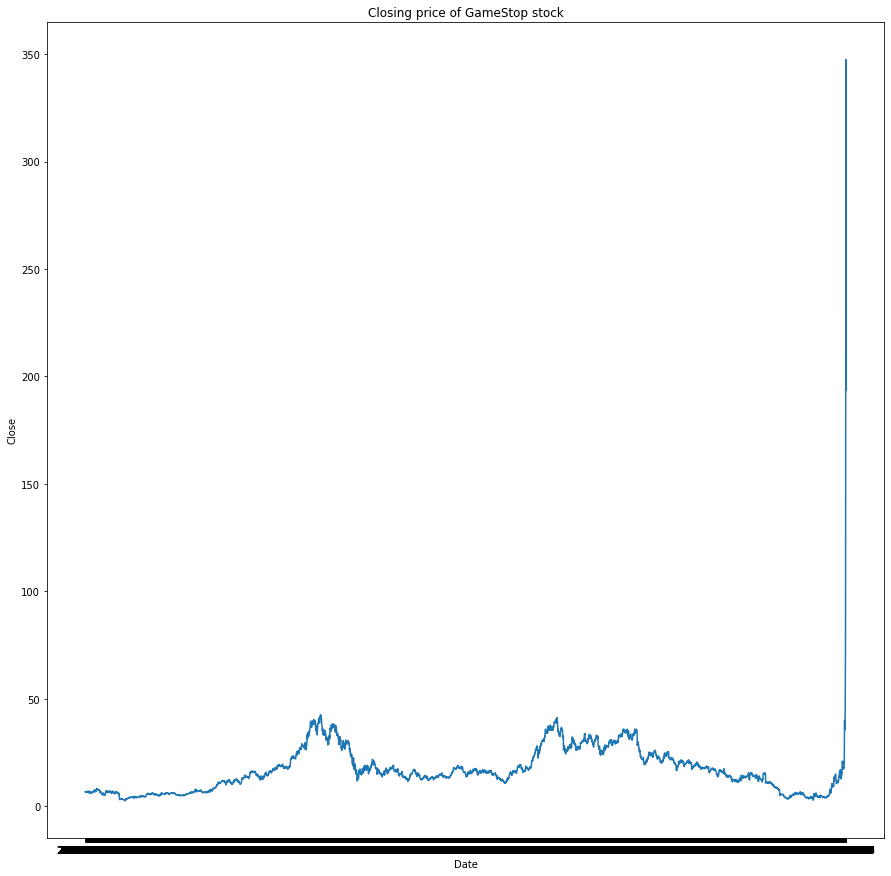

In [10]:
# plotting closing prices for stock 

plt.figure(figsize=(15,15))
sns.lineplot(x = prices['Date'], y = prices['Close'])
plt.title('Closing price of GameStop stock')

In [75]:
# since we are looking into what happened during the last months of 2020 and beginning of 2021
# lets look at the price closing since August of 2020, to understand the jump in price better

prices_aug_jan = prices.loc[(prices['Date'] >= '2020-08-01')]

prices_aug_jan.head()

Date  Open  High   Low  Close    Volume  Dividends  Stock Splits
4649  2020-08-03  4.03  4.25  4.00   4.15   2517600        0.0           0.0
4650  2020-08-04  4.13  4.74  4.13   4.43  10361400        0.0           0.0
4651  2020-08-05  4.50  4.76  4.25   4.63   4925700        0.0           0.0
4652  2020-08-06  4.60  4.66  4.38   4.43   1901200        0.0           0.0
4653  2020-08-07  4.39  4.40  4.06   4.16   3341100        0.0           0.0

In [12]:
# shape of new dataframe, selecting price information from August 2020 until January 2021
prices_aug_jan.shape

(125, 8)

In [74]:
# looking at last 5 row information
prices_aug_jan.tail()

Date        Open        High         Low       Close     Volume  \
4769  2021-01-25   96.730003  159.179993   61.130001   76.790001  177874000   
4770  2021-01-26   88.559998  150.000000   80.199997  147.979996  178588000   
4771  2021-01-27  354.829987  380.000000  249.000000  347.510010   93396700   
4772  2021-01-28  265.000000  483.000000  112.250000  193.600006   58815800   
4773  2021-01-29  379.709991  413.980011  250.000000  325.000000   50397132   

      Dividends  Stock Splits  
4769        0.0           0.0  
4770        0.0           0.0  
4771        0.0           0.0  
4772        0.0           0.0  
4773        0.0           0.0

Text(0.5, 1.0, 'Closing price of GameStop stock - August 2020 to January 2021')

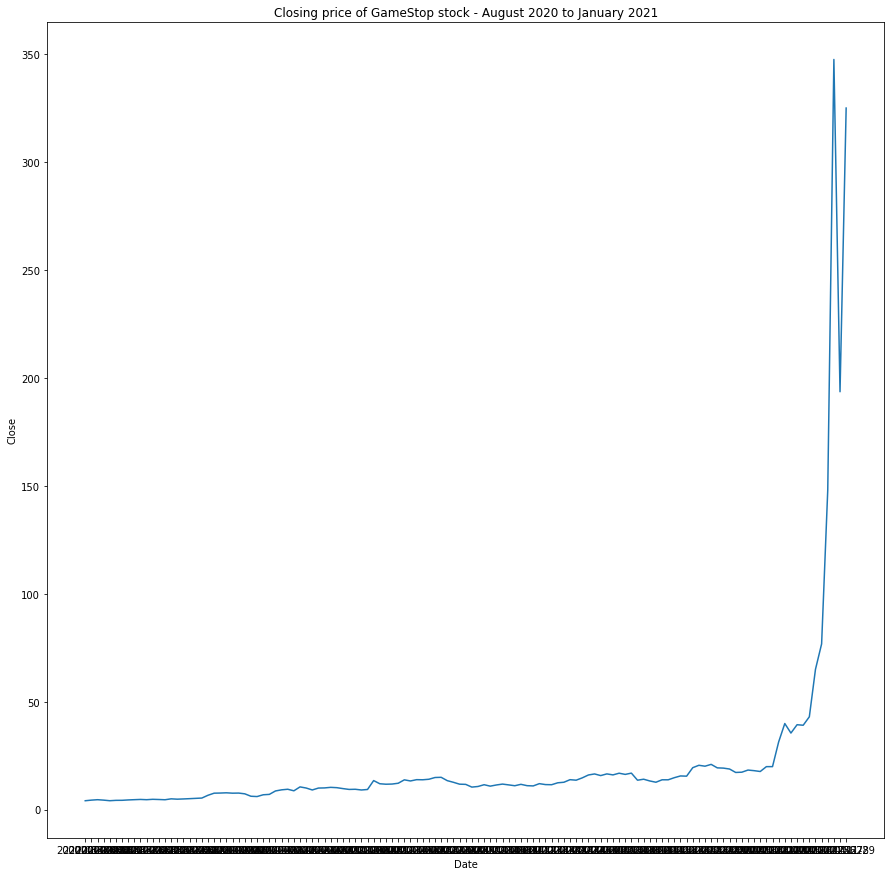

In [14]:
# plotting closing prices for stock since August 2020 

plt.figure(figsize=(15,15))
sns.lineplot(x = prices_aug_jan['Date'], y = prices_aug_jan['Close'])
plt.title('Closing price of GameStop stock - August 2020 to January 2021')

<Figure size 1800x1800 with 0 Axes>

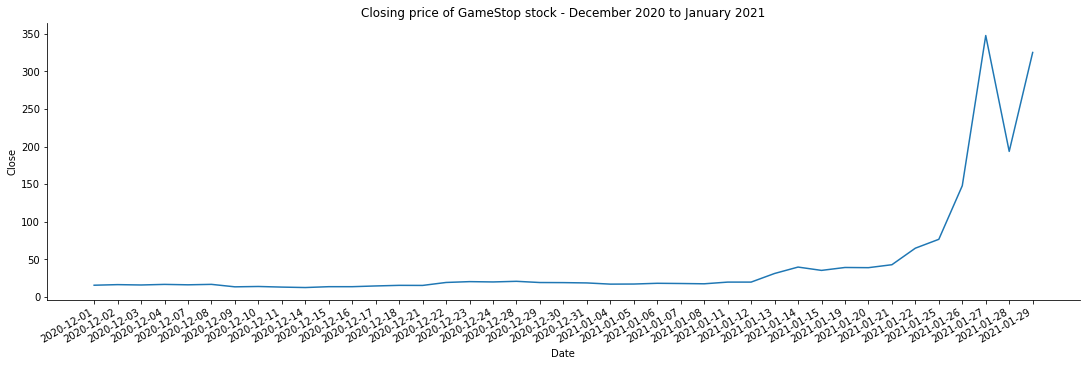

In [16]:
# plotting closing prices from December 2020 until January 2021
plt.figure(figsize=(25,25))
g = sns.relplot(x="Date", y="Close", kind="line", data=prices_dec_jan, height=5,aspect=3)
plt.title('Closing price of GameStop stock - December 2020 to January 2021')
g.fig.autofmt_xdate()

In [17]:
############################ SELECTING PRICES FROM OCTOBER 01 2020  UNTIL JANUARY 29 2021

# first we copy prices dataframe, and select the timeframe to look up

price_copy = prices.copy()
price_copy = price_copy.loc[(price_copy['Date'] >= '2020-10-01')]

# then, we drop columns that we do not need: High, Low, Dividends, Stock Splits

price_copy = price_copy.drop(['High','Low','Dividends','Stock Splits'], 1)
price_copy.tail()

# price_copy.shape # 83 rows and 4 columns

Date        Open       Close     Volume
4769  2021-01-25   96.730003   76.790001  177874000
4770  2021-01-26   88.559998  147.979996  178588000
4771  2021-01-27  354.829987  347.510010   93396700
4772  2021-01-28  265.000000  193.600006   58815800
4773  2021-01-29  379.709991  325.000000   50397132

In [18]:
############################################## Adding labels in price data

# Now, we are going to add labels to our data, where the trend_Label will be the Close - Open > 0 as 1, u
# otherwise the difference is negative and we label it as 0, downtrend.

uptrend = 1
downtrend = 0

price_copy['Difference'] = price_copy['Close'] - price_copy['Open']
price_copy['trend_label'] = [uptrend if x > 0 else downtrend for x in price_copy['Difference']]

# we then can drop the Difference column, since we are done using it for now

price_copy = price_copy.drop(['Difference'], 1)

price_copy['Date'] = pd.to_datetime(price_copy['Date'])
price_copy.head()

Date   Open  Close   Volume  trend_label
4691 2020-10-01  10.09   9.77  4554100            0
4692 2020-10-02   9.38   9.39  4340500            1
4693 2020-10-05   9.44   9.46  2805000            1
4694 2020-10-06   9.56   9.13  4535400            0
4695 2020-10-07   9.23   9.36  3308600            1

Text(0.5, 1.0, 'Distribution of trend labels for October 2020 - January 2021')

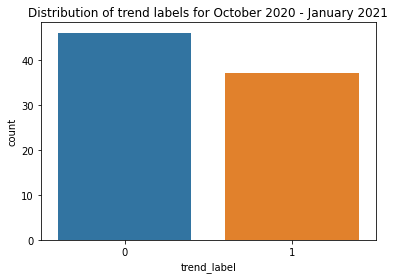

In [19]:
# checking distribution of the label column in dataset
sns.countplot(data = price_copy, x='trend_label')
plt.title("Distribution of trend labels for October 2020 - January 2021")

<Figure size 1800x1800 with 0 Axes>

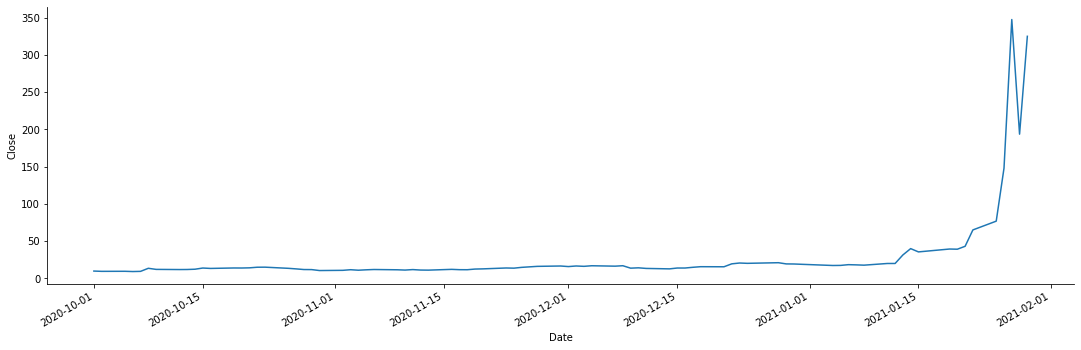

In [20]:
# Plotting price close plot from October 01 2020 until January 29 2021

plt.figure(figsize=(25,25))
g = sns.relplot(x="Date", y="Close", kind="line", data=price_copy,height=5,aspect=3)
g.fig.autofmt_xdate()

<Figure size 1800x1800 with 0 Axes>

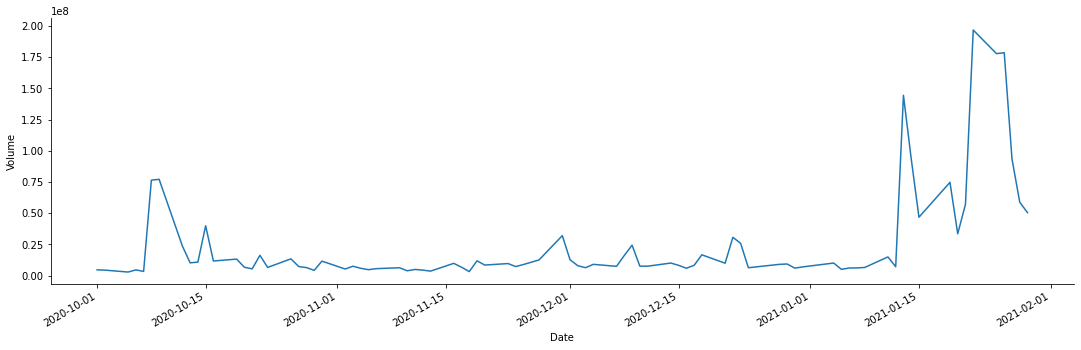

In [21]:
# plotting Volume through time, we see that when the stock was on more sportlight, the volume increased.

plt.figure(figsize=(25,25))
g = sns.relplot(x="Date", y="Volume", kind="line", data=price_copy,height=5,aspect=3)
g.fig.autofmt_xdate()

### Volume as feature
We see that during the period of January, there was a lot of volume in tradings. We will include volume as a feature. 


## WallStreetBets reddit data
The data is from the social media subreddit WallStreetBets.

In [22]:
# analyzing reddit wall street bets dataframe
reddit_wsb.shape

(884063, 12)

In [23]:
(reddit_wsb.columns)

Index(['id', 'title', 'score', 'author', 'author_flair_text', 'removed_by',
       'total_awards_received', 'awarders', 'created_utc', 'full_link',
       'num_comments', 'over_18'],
      dtype='object')

In [24]:
# visualing the first 10 rows of information
reddit_wsb.head(10)

id                                              title  score  \
0  l98rqo  Are you guys idiots? The sub has been brigaded...      1   
1  l98rpt                             Your Game Stops here!!      1   
2  l98rnz   u/DEEPFUCKINGVALUE dropping knowledge on the sub      1   
3  l98rnm                      They'll learn, give them time      1   
4  l98rn1                                    invest - stocks      1   
5  l98rlu                                      The Next Move      1   
6  l98rk5                BEWARE OF THE TACTIC 2.0 ðŸ‡ºðŸ‡¸GME AMCðŸš€      1   
7  l98rip           Reinforcements are Coming - KEEP HOLDING      1   
8  l98rhr             BEWARE OF THE TACTIC 2.0 ðŸ‡ºðŸ‡¸ðŸš€GME AMCðŸš€ðŸ‡ºðŸ‡¸      1   
9  l98rhn                                        Help newbie      1   

                author author_flair_text removed_by  total_awards_received  \
0  Crazed_waffle_party               NaN  moderator                    0.0   
1           Drahcir830               NaN  moderator                    0.0   
2      TravellingGonzo               NaN  moderator                    0.0   
3      GloriousDioxide               NaN  moderator                    0.0   
4               ART_KH               NaN  moderator                    0.0   
5          danteheck97               NaN  moderator                    0.0   
6                bd981               NaN  moderator                    0.0   
7              npage34               NaN  moderator                    0.0   
8                bd981               NaN  moderator                    0.0   
9              arve666               NaN  moderator                    0.0   

  awarders  created_utc                                          full_link  \
0       []   1612084255  https://www.reddit.com/r/wallstreetbets/commen...   
1       []   1612084251  https://www.reddit.com/r/wallstreetbets/commen...   
2       []   1612084245  https://www.reddit.com/r/wallstreetbets/commen...   
3       []   1612084243  https://www.reddit.com/r/wallstreetbets/commen...   
4       []   1612084240  https://www.reddit.com/r/wallstreetbets/commen...   
5       []   1612084235  https://www.reddit.com/r/wallstreetbets/commen...   
6       []   1612084229  https://www.reddit.com/r/wallstreetbets/commen...   
7       []   1612084224  https://www.reddit.com/r/wallstreetbets/commen...   
8       []   1612084221  https://www.reddit.com/r/wallstreetbets/commen...   
9       []   1612084221  https://www.reddit.com/r/wallstreetbets/commen...   

   num_comments  over_18  
0             0    False  
1             0    False  
2             0    False  
3             0    False  
4             0    False  
5             0    False  
6             0    False  
7             0    False  
8             0    False  
9             0    False

In [76]:
# changing UTC timestamp to datetime pandas format

reddit_wsb['created_utc'] = pd.to_datetime(reddit_wsb['created_utc'], unit = 's')

# sorting dataframe by date, ascending order from older to newer
reddit_wsb = reddit_wsb.sort_values(by='created_utc')
reddit_wsb.head()

id                                              title  score  \
884062  s4jw1         Earnings season is here.  Place your bets.     13   
884061  s6r57         GOOG - beat estimates, price barely rises.      2   
884060  sd5ai  My poorly timed opening position for AAPL earn...     12   
884059  se66f  Anyone betting on VVUS and their potential app...      1   
884058  shtex  EBAY posts higher 1Q net income and revenue, s...      7   

                  author author_flair_text removed_by  total_awards_received  \
884062         [deleted]               NaN        NaN                    NaN   
884061         [deleted]               NaN        NaN                    NaN   
884060         [deleted]               NaN        NaN                    NaN   
884059         [deleted]               NaN        NaN                    NaN   
884058  secondhandsondek               NaN        NaN                    NaN   

       awarders         created_utc  \
884062      NaN 2012-04-11 16:40:40   
884061      NaN 2012-04-12 20:37:31   
884060      NaN 2012-04-16 22:29:37   
884059      NaN 2012-04-17 13:41:30   
884058      NaN 2012-04-19 14:10:20   

                                                full_link  num_comments  \
884062  https://www.reddit.com/r/wallstreetbets/commen...            22   
884061  https://www.reddit.com/r/wallstreetbets/commen...             0   
884060  https://www.reddit.com/r/wallstreetbets/commen...            21   
884059  https://www.reddit.com/r/wallstreetbets/commen...             0   
884058  https://www.reddit.com/r/wallstreetbets/commen...             4   

        over_18  
884062    False  
884061    False  
884060    False  
884059    False  
884058    False

In [26]:
# since we are looking into what happened during the last months of 2020 and beginning of 2021
# lets look at the price closing since August of 2020, to understand the jump in price better

reddit_wsb_aug_jan = reddit_wsb.loc[(reddit_wsb['created_utc'] >= '2020-08-01')]

reddit_wsb_aug_jan.head()

id                           title  score        author  \
450256  i1ihdf  Itâ€™s the little things in life      1  2Mango2Tango   
450255  i1ihe3  WSBVoteBot Log for Aug 01 2020      1    WSBVoteBot   
450254  i1iifn    Thatâ€™s it for me folks. #RIP      1     ReedFoley   
450253  i1iiw3                     King Shit ðŸ‘‘      1   PhantomFuck   
450252  i1ijgb        1-2k for starting budget      1   Kingmurat19   

        author_flair_text removed_by  total_awards_received awarders  \
450256  bingo bango bongo     reddit                    0.0       []   
450255      Robot Janitor        NaN                    0.0       []   
450254                NaN     reddit                    0.0       []   
450253                NaN     reddit                    0.0       []   
450252                NaN        NaN                    0.0       []   

               created_utc                                          full_link  \
450256 2020-08-01 00:00:22  https://www.reddit.com/r/wallstreetbets/commen...   
450255 2020-08-01 00:00:23  https://www.reddit.com/r/wallstreetbets/commen...   
450254 2020-08-01 00:02:12  https://www.reddit.com/r/wallstreetbets/commen...   
450253 2020-08-01 00:03:01  https://www.reddit.com/r/wallstreetbets/commen...   
450252 2020-08-01 00:04:03  https://www.reddit.com/r/wallstreetbets/commen...   

        num_comments  over_18  
450256             1    False  
450255            15    False  
450254             0    False  
450253             0    False  
450252            19    False

In [27]:
# shape of dataset
reddit_wsb_aug_jan.shape

(450257, 12)

In [28]:
# looking at last 5 rows of our dataset from wallstreetbets subreddit
reddit_wsb_aug_jan.tail()

id                                              title  score  \
4  l98rn1                                    invest - stocks      1   
3  l98rnm                      They'll learn, give them time      1   
2  l98rnz   u/DEEPFUCKINGVALUE dropping knowledge on the sub      1   
1  l98rpt                             Your Game Stops here!!      1   
0  l98rqo  Are you guys idiots? The sub has been brigaded...      1   

                author author_flair_text removed_by  total_awards_received  \
4               ART_KH               NaN  moderator                    0.0   
3      GloriousDioxide               NaN  moderator                    0.0   
2      TravellingGonzo               NaN  moderator                    0.0   
1           Drahcir830               NaN  moderator                    0.0   
0  Crazed_waffle_party               NaN  moderator                    0.0   

  awarders         created_utc  \
4       [] 2021-01-31 09:10:40   
3       [] 2021-01-31 09:10:43   
2       [] 2021-01-31 09:10:45   
1       [] 2021-01-31 09:10:51   
0       [] 2021-01-31 09:10:55   

                                           full_link  num_comments  over_18  
4  https://www.reddit.com/r/wallstreetbets/commen...             0    False  
3  https://www.reddit.com/r/wallstreetbets/commen...             0    False  
2  https://www.reddit.com/r/wallstreetbets/commen...             0    False  
1  https://www.reddit.com/r/wallstreetbets/commen...             0    False  
0  https://www.reddit.com/r/wallstreetbets/commen...             0    False

# Subreddit posts - after Sentiment Analysis 

In [29]:
###########################   WallStreetBets posts with sentiment

reddit_data_sa_filepath = "./reddit_data_sa.csv"
reddit_data_sa = pd.read_csv(reddit_data_sa_filepath)
reddit_data_sa.shape

(884063, 15)

In [30]:
reddit_data_sa.describe()

Unnamed: 0          score  total_awards_received   created_utc  \
count  884063.000000  884063.000000          682643.000000  8.840630e+05   
mean   442031.000000      16.993441               0.010798  1.579604e+09   
std    255207.149853     335.836433               0.824299  4.367248e+07   
min         0.000000       0.000000               0.000000  1.334162e+09   
25%    221015.500000       1.000000               0.000000  1.565176e+09   
50%    442031.000000       1.000000               0.000000  1.597269e+09   
75%    663046.500000       1.000000               0.000000  1.611843e+09   
max    884062.000000   55907.000000             334.000000  1.612084e+09   

        num_comments       compound          label  
count  884063.000000  884063.000000  884063.000000  
mean       32.719961       0.028560       0.437438  
std       814.066304       0.320956       0.496071  
min         0.000000      -0.999700       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         7.000000       0.077200       1.000000  
max    150334.000000       0.999900       1.000000

In [31]:
##########################  label was not giving negative sentiment. Now, it has been fixed.

reddit_data_sa.loc[reddit_data_sa['compound'] > 0.10, 'label'] = 1
reddit_data_sa.loc[reddit_data_sa['compound'] < -0.10, 'label'] = -1
reddit_data_sa.describe()

Unnamed: 0          score  total_awards_received   created_utc  \
count  884063.000000  884063.000000          682643.000000  8.840630e+05   
mean   442031.000000      16.993441               0.010798  1.579604e+09   
std    255207.149853     335.836433               0.824299  4.367248e+07   
min         0.000000       0.000000               0.000000  1.334162e+09   
25%    221015.500000       1.000000               0.000000  1.565176e+09   
50%    442031.000000       1.000000               0.000000  1.597269e+09   
75%    663046.500000       1.000000               0.000000  1.611843e+09   
max    884062.000000   55907.000000             334.000000  1.612084e+09   

        num_comments       compound          label  
count  884063.000000  884063.000000  884063.000000  
mean       32.719961       0.028560       0.061567  
std       814.066304       0.320956       0.658520  
min         0.000000      -0.999700      -1.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         7.000000       0.077200       0.000000  
max    150334.000000       0.999900       1.000000

In [32]:
reddit_data_sa.head()

Unnamed: 0      id                                              title  \
0           0  l98rqo  Are you guys idiots? The sub has been brigaded...   
1           1  l98rpt                             Your Game Stops here!!   
2           2  l98rnz   u/DEEPFUCKINGVALUE dropping knowledge on the sub   
3           3  l98rnm                      They'll learn, give them time   
4           4  l98rn1                                    invest - stocks   

   score               author author_flair_text removed_by  \
0      1  Crazed_waffle_party               NaN  moderator   
1      1           Drahcir830               NaN  moderator   
2      1      TravellingGonzo               NaN  moderator   
3      1      GloriousDioxide               NaN  moderator   
4      1               ART_KH               NaN  moderator   

   total_awards_received awarders  created_utc  \
0                    0.0       []   1612084255   
1                    0.0       []   1612084251   
2                    0.0       []   1612084245   
3                    0.0       []   1612084243   
4                    0.0       []   1612084240   

                                           full_link  num_comments  over_18  \
0  https://www.reddit.com/r/wallstreetbets/commen...             0    False   
1  https://www.reddit.com/r/wallstreetbets/commen...             0    False   
2  https://www.reddit.com/r/wallstreetbets/commen...             0    False   
3  https://www.reddit.com/r/wallstreetbets/commen...             0    False   
4  https://www.reddit.com/r/wallstreetbets/commen...             0    False   

   compound  label  
0    0.0000      0  
1   -0.2960     -1  
2   -0.2732     -1  
3    0.0000      0  
4    0.0000      0

In [33]:
# changing UTC timestamp to datetime pandas format

reddit_data_sa['created_utc'] = pd.to_datetime(reddit_data_sa['created_utc'], unit = 's')

reddit_data_sa['created_utc'] = reddit_data_sa['created_utc'].dt.floor('D')

# sorting dataframe by date, ascending order from older to newer

reddit_data_sa = reddit_data_sa.sort_values(by='created_utc', ascending = False)
reddit_data_sa.head()

Unnamed: 0      id                                              title  \
0              0  l98rqo  Are you guys idiots? The sub has been brigaded...   
8305        8305  l91zvj                               Jr. is on your side!   
8283        8283  l920ab                           Doge coin next or what??   
8284        8284  l9209v                         Found this fun little tool   
8285        8285  l9208z                                   Help With Stocks   

      score               author author_flair_text removed_by  \
0         1  Crazed_waffle_party               NaN  moderator   
8305      1  BidenTheBallSniffer               NaN  moderator   
8283      1            tolli0717               NaN  moderator   
8284      1      Ka-HinoteKarite               NaN  moderator   
8285      1        Sahara-Wyvern               NaN  moderator   

      total_awards_received awarders created_utc  \
0                       0.0       []  2021-01-31   
8305                    0.0       []  2021-01-31   
8283                    0.0       []  2021-01-31   
8284                    0.0       []  2021-01-31   
8285                    0.0       []  2021-01-31   

                                              full_link  num_comments  \
0     https://www.reddit.com/r/wallstreetbets/commen...             0   
8305  https://www.reddit.com/r/wallstreetbets/commen...             0   
8283  https://www.reddit.com/r/wallstreetbets/commen...             0   
8284  https://www.reddit.com/r/wallstreetbets/commen...             0   
8285  https://www.reddit.com/r/wallstreetbets/commen...             1   

      over_18  compound  label  
0       False    0.0000      0  
8305    False    0.0000      0  
8283    False    0.0000      0  
8284    False    0.5106      1  
8285    False    0.4019      1

In [34]:
# lets make a copy of this dataframe, and select the time frame we want for now

# first, start dataset from October 01, 2020

reddit_sa_copy = reddit_data_sa.copy()
reddit_sa_copy = reddit_sa_copy.loc[(reddit_sa_copy['created_utc'] >= '2020-10-01')]

# next, we want data until January 29, 2021

reddit_sa_copy = reddit_sa_copy.loc[(reddit_sa_copy['created_utc'] < '2021-01-30')]
reddit_sa_copy.describe()

Unnamed: 0          score  total_awards_received   num_comments  \
count  351386.000000  351386.000000          351386.000000  351386.000000   
mean   229942.500000       3.157513               0.014309      23.272111   
std    101436.545182     126.439170               1.106645     867.892282   
min     54250.000000       0.000000               0.000000       0.000000   
25%    142096.250000       1.000000               0.000000       0.000000   
50%    229942.500000       1.000000               0.000000       0.000000   
75%    317788.750000       1.000000               0.000000       2.000000   
max    405635.000000   32863.000000             334.000000  150334.000000   

            compound          label  
count  351386.000000  351386.000000  
mean        0.029261       0.059795  
std         0.323790       0.659761  
min        -0.996700      -1.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.077200       0.000000  
max         0.999900       1.000000

In [35]:
reddit_sa_copy = reddit_sa_copy.sort_values(by='created_utc', ascending = True)
reddit_sa_copy.head()

Unnamed: 0      id                              title  score  \
405276      405276  j3f728  DKNG gain. Going to let it expire      1   
405605      405605  j2zhn2    13F cloning, a viable strategy?      1   
405606      405606  j2zdx5      $PG set for takeoffâ€”CONFIRMED      1   
405373      405373  j3cd8j              What to yolo on next?      1   
405635      405635  j2xqyk     WSBVoteBot Log for Oct 01 2020      1   

                 author author_flair_text removed_by  total_awards_received  \
405276         Smoodeee               NaN  moderator                    0.0   
405605  ChungleMcBungus               NaN  moderator                    0.0   
405606      CunilDingus               NaN     reddit                    0.0   
405373     Stonksupdown               NaN  moderator                    0.0   
405635       WSBVoteBot     Robot Janitor        NaN                    0.0   

       awarders created_utc  \
405276       []  2020-10-01   
405605       []  2020-10-01   
405606       []  2020-10-01   
405373       []  2020-10-01   
405635       []  2020-10-01   

                                                full_link  num_comments  \
405276  https://www.reddit.com/r/wallstreetbets/commen...             0   
405605  https://www.reddit.com/r/wallstreetbets/commen...             0   
405606  https://www.reddit.com/r/wallstreetbets/commen...             1   
405373  https://www.reddit.com/r/wallstreetbets/commen...             2   
405635  https://www.reddit.com/r/wallstreetbets/commen...            19   

        over_18  compound  label  
405276    False    0.5267      1  
405605    False    0.0000      0  
405606    False    0.0000      0  
405373    False    0.2732      1  
405635    False    0.0000      0

### 1) Modeling the data


In [78]:
##################################  SELECTING ONLY THE DATA WE WANT FOR MODEL 1

reddit_sa_copy_model_one = reddit_sa_copy[['created_utc','label','num_comments','total_awards_received','score']]
reddit_sa_copy_model_one.head()

created_utc  label  num_comments  total_awards_received  score
405276  2020-10-01      1             0                    0.0      1
405605  2020-10-01      0             0                    0.0      1
405606  2020-10-01      0             1                    0.0      1
405373  2020-10-01      1             2                    0.0      1
405635  2020-10-01      0            19                    0.0      1

          Date  n_label_negative  n_label_neutral  n_label_positive  \
0   2020-10-01             115.0            286.0             125.0   
1   2020-10-02             170.0            488.0             218.0   
2   2020-10-03              62.0            199.0              77.0   
3   2020-10-04              53.0            169.0              60.0   
4   2020-10-05             111.0            294.0             123.0   
..         ...               ...              ...               ...   
116 2021-01-25            1786.0           6381.0            2497.0   
117 2021-01-26            1041.0           3766.0            1619.0   
118 2021-01-27            6637.0          17132.0            8482.0   
119 2021-01-28           25889.0          67489.0           27591.0   
120 2021-01-29           14928.0          48948.0           20878.0   

     num_comments  total_awards_received     score  vote_score1  vote_score2  \
0       97.802281               0.019011  1.825095     0.041667    

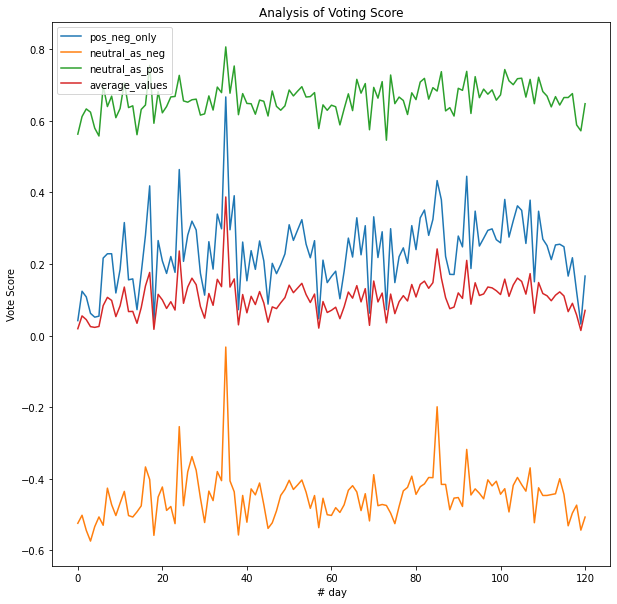

In [38]:
#################################  function to count labels for each day
def count_labels_in_df(df):
    # find unique labels
    unique_labels = np.array([-1,0,1])#df['label'].unique()
    label_count = np.zeros(shape=unique_labels.shape)

    # count how much we have for each label
    for i in range(unique_labels.shape[0]):
        unique_label = unique_labels[i]
        df_with_desired_label = df[df['label'] == unique_label]
        label_count[i] = df_with_desired_label.shape[0]
        
    # return labels and count
    return unique_labels, label_count
        
# get label count for each day
unique_days = reddit_sa_copy_model_one['created_utc'].unique()
results_dict = {
    'Date': [],
    'n_label_negative' : [],
    'n_label_neutral' : [],
    'n_label_positive' : [],
    'num_comments' : [],
    'total_awards_received' : [],
    'score' : [],
}

# run a for loop to check per day, how many positive, neutral and negative values are, 
# and save it in a dictionary, the day and 3 count values

for j in range(unique_days.shape[0]):
    # find count per day
    df_for_each_day = reddit_sa_copy_model_one[reddit_sa_copy_model_one['created_utc'] == unique_days[j]]
    unique_labels, label_count = count_labels_in_df(df_for_each_day)
        
    # aggregate other metrics AVERAGE
    num_comments = df_for_each_day['num_comments'].mean()
    total_awards_received = df_for_each_day['total_awards_received'].mean()
    score = df_for_each_day['score'].mean()
    
#     # aggregate other metrics MIXED SUM AND AVERAGE
#     num_comments = df_for_each_day['num_comments'].sum()
#     total_awards_received = df_for_each_day['total_awards_received'].mean()
#     score = df_for_each_day['score'].mean()
    
    # save results in dict, per day
    results_dict['Date'].append(unique_days[j])
    results_dict['n_label_negative'].append(label_count[0])
    results_dict['n_label_neutral'].append(label_count[1])
    results_dict['n_label_positive'].append(label_count[2])    
    results_dict['num_comments'].append(num_comments)
    results_dict['total_awards_received'].append(total_awards_received)
    results_dict['score'].append(score)
    
# convert results dict in dataframe
results_df = pd.DataFrame.from_dict(results_dict)

###############################   couple ways of obtaining sentiment per day
# ignoring neutral
results_df['vote_score1'] = (results_df['n_label_negative']*-1 + results_df['n_label_positive']*1)/(results_df['n_label_negative']+results_df['n_label_positive'])
# neutral sentiment as negative value 
results_df['vote_score2'] = (results_df['n_label_negative']*-1 + results_df['n_label_neutral']*-1 + results_df['n_label_positive']*1)/(results_df['n_label_negative']+results_df['n_label_neutral']+results_df['n_label_positive'])
# neutral sentiment as positive value 
results_df['vote_score3'] = (results_df['n_label_negative']*-1 + results_df['n_label_neutral']*1 + results_df['n_label_positive']*1)/(results_df['n_label_negative']+results_df['n_label_neutral']+results_df['n_label_positive'])
# neutral sentiment as neutral value, zero value ------ sentiment as a average per day
results_df['vote_average'] = (results_df['n_label_negative']*-1 + results_df['n_label_neutral']*0 + results_df['n_label_positive']*1)/(results_df['n_label_negative']+results_df['n_label_neutral']+results_df['n_label_positive'])

print(results_df)

# visualization of the different ways to get sentiment 
plt.figure(figsize=[10,10])
plt.title('Analysis of Voting Score')
plt.plot(results_df['vote_score1'], label='pos_neg_only')
plt.plot(results_df['vote_score2'], label='neutral_as_neg')
plt.plot(results_df['vote_score3'], label='neutral_as_pos')
plt.plot(results_df['vote_average'], label='average_values')
plt.ylabel('Vote Score')
plt.xlabel('# day')
plt.legend()
plt.show()

- Seeing the plot above, we decided to get the sentiment per day as using average values,not ignoring the neutral sentiment

In [39]:
##################### feature one of our model - sentiment scores per day - taking average scores

# model with sentiment
results_sa_one = results_df[['Date','vote_average']]

# model with sentiment and volume traded
results_sa_two = results_df[['Date','vote_average']]

# model with sentiment and comments, and also then add volume of stocks traded
results_sa_three = results_df[['Date','vote_average', 'num_comments']]

# MODEL WITH ALL SENTIMENT FEATURES
results_sa_six = results_df[['Date','vote_average','num_comments', 'total_awards_received','score']]

# for model one and three
price_copy_model_one = price_copy[['Date','trend_label']]

# adding Volume as feature, for model two and four

price_copy_model_two = price_copy[['Date','Volume','trend_label']]
price_copy_model_two.iloc[0,0]

Timestamp('2020-10-01 00:00:00')

In [40]:
results_sa_six.tail()

Date  vote_average  num_comments  total_awards_received     score
116 2021-01-25      0.066673      0.371155               0.000000  1.033196
117 2021-01-26      0.089947      0.624339               0.000000  1.009804
118 2021-01-27      0.057208     24.430343               0.051843  7.964683
119 2021-01-28      0.014070     10.504766               0.015318  3.593061
120 2021-01-29      0.070203     11.735953               0.000000  1.007905

In [41]:
results_sa_two.head()

Date  vote_average
0 2020-10-01      0.019011
1 2020-10-02      0.054795
2 2020-10-03      0.044379
3 2020-10-04      0.024823
4 2020-10-05      0.022727

In [42]:
results_sa_three.head()

Date  vote_average  num_comments
0 2020-10-01      0.019011     97.802281
1 2020-10-02      0.054795     79.386986
2 2020-10-03      0.044379     21.254438
3 2020-10-04      0.024823     68.010638
4 2020-10-05      0.022727     73.920455

In [43]:
price_copy_model_one.head()

Date  trend_label
4691 2020-10-01            0
4692 2020-10-02            1
4693 2020-10-05            1
4694 2020-10-06            0
4695 2020-10-07            1

In [44]:
price_copy_model_two.head()

Date   Volume  trend_label
4691 2020-10-01  4554100            0
4692 2020-10-02  4340500            1
4693 2020-10-05  2805000            1
4694 2020-10-06  4535400            0
4695 2020-10-07  3308600            1

In [79]:
############################ model one: feature ---- 'vote_average'

# merge the price and sentiment dataset for that period October 2020 to January 2021
model_one = pd.merge(results_sa_one, price_copy_model_one, on=['Date'], how='inner')
model_one.head()

Date  vote_average  trend_label
0 2020-10-01      0.019011            0
1 2020-10-02      0.054795            1
2 2020-10-05      0.022727            1
3 2020-10-06      0.025284            0
4 2020-10-07      0.083573            1

In [80]:
############################  model two: feature ---- 'vote_average', 'Volume'

# merge the price and sentiment dataset for that period October 2020 to January 2021

model_two = pd.merge(results_sa_two, price_copy_model_two, on=['Date'], how='inner')
model_two.head()

Date  vote_average   Volume  trend_label
0 2020-10-01      0.019011  4554100            0
1 2020-10-02      0.054795  4340500            1
2 2020-10-05      0.022727  2805000            1
3 2020-10-06      0.025284  4535400            0
4 2020-10-07      0.083573  3308600            1

In [81]:
############################  model three: feature ---- 'vote_average', 'n_comments',

# merge the price and sentiment dataset for that period October 2020 to January 2021
 
model_three = pd.merge(results_sa_three, price_copy_model_one, on=['Date'], how='inner')
model_three.head()

Date  vote_average  num_comments  trend_label
0 2020-10-01      0.019011     97.802281            0
1 2020-10-02      0.054795     79.386986            1
2 2020-10-05      0.022727     73.920455            1
3 2020-10-06      0.025284     71.800253            0
4 2020-10-07      0.083573     66.991354            1

In [82]:
############################  model four: feature ---- 'vote_average', 'num_comments','Volume'

# merge the price and sentiment dataset for that period October 2020 to January 2021

model_four = pd.merge(results_sa_three, price_copy_model_two, on=['Date'], how='inner')
model_four.head()

Date  vote_average  num_comments   Volume  trend_label
0 2020-10-01      0.019011     97.802281  4554100            0
1 2020-10-02      0.054795     79.386986  4340500            1
2 2020-10-05      0.022727     73.920455  2805000            1
3 2020-10-06      0.025284     71.800253  4535400            0
4 2020-10-07      0.083573     66.991354  3308600            1

In [83]:
############################  model six pure sentiment: 
##                      feature ----     'Date','vote_average','num_comments', 'total_awards_received','score'

# merge the price and sentiment dataset for that period October 2020 to January 2021

model_six = pd.merge(results_sa_six, price_copy_model_one, on=['Date'], how='inner')
model_six.head()

Date  vote_average  num_comments  total_awards_received     score  \
0 2020-10-01      0.019011     97.802281               0.019011  1.825095   
1 2020-10-02      0.054795     79.386986               0.000000  1.003425   
2 2020-10-05      0.022727     73.920455               0.000000  1.003788   
3 2020-10-06      0.025284     71.800253               0.000000  1.063211   
4 2020-10-07      0.083573     66.991354               0.000000  1.001441   

   trend_label  
0            0  
1            1  
2            1  
3            0  
4            1

### Adding some domain knowledge - S&P 500 Market Index

The Standard and Poor's 500,or simply the S&P 500, is a free-float, weighted measurement stock market index of the 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices. Source (Wikipedia)

In [50]:
sp_path = './S&P_ US_SPX.csv'
sp_data = pd.read_csv(sp_path)
sp_data.head()

Date      Open      High       Low     Close
0  01/29/2021  3,778.05  3,778.05  3,694.12  3,714.24
1  01/28/2021  3,755.75  3,830.50  3,755.75  3,787.38
2  01/27/2021  3,836.83  3,836.83  3,732.48  3,750.77
3  01/26/2021  3,862.96  3,870.90  3,847.78  3,849.62
4  01/25/2021  3,851.68  3,859.23  3,797.16  3,855.36

In [51]:
sp_data['Date'] = pd.to_datetime(sp_data['Date'])
sp_data = sp_data.sort_values(by='Date', ascending = True)

sp_data['Close'] = sp_data['Close'].str.replace(',', '')
sp_data['Open'] = sp_data['Open'].str.replace(',', '')
sp_data['Close'] = pd.to_numeric(sp_data['Close'])
sp_data['Open'] = pd.to_numeric(sp_data['Open'])

# dija_data.head()

sp_data['Close'].isna().sum()


0

In [52]:
sp_data['Open'].isna().sum()

0

In [53]:
uptrend = 1
downtrend = 0 
sp_data['Difference'] = sp_data['Close'] - sp_data['Open']
sp_data['trend_s&p'] = [uptrend if x > 0 else downtrend for x in sp_data['Difference']]


In [54]:
sp_data = sp_data.drop(['Difference'], 1)

sp_data.head()

Date     Open      High       Low    Close  trend_s&p
82 2020-10-01  3385.87  3,397.18  3,361.39  3380.80          0
81 2020-10-02  3338.94  3,369.10  3,323.69  3348.44          1
80 2020-10-05  3367.27  3,409.57  3,367.27  3408.63          1
79 2020-10-06  3408.74  3,431.56  3,354.54  3360.95          0
78 2020-10-07  3384.56  3,426.26  3,384.56  3419.45          1

In [55]:
sp_data = sp_data[['Date','trend_s&p']]
sp_data.shape

(83, 2)

In [85]:
############################  model five: feature ---- 'vote_average', 'num_comments','Volume', 'trend_s&p'

# merge the model four with s&p dataset for that period October 2020 to January 2021

model_five = pd.merge(model_four, sp_data, on=['Date'], how='inner')
model_five.head()

Date  vote_average  num_comments   Volume  trend_label  trend_s&p
0 2020-10-01      0.019011     97.802281  4554100            0          0
1 2020-10-02      0.054795     79.386986  4340500            1          1
2 2020-10-05      0.022727     73.920455  2805000            1          1
3 2020-10-06      0.025284     71.800253  4535400            0          0
4 2020-10-07      0.083573     66.991354  3308600            1          1

In [86]:
############################  MODEL SEVEN sentiment, other features reddit post + S&P index trend + Volume : 
##    features -- 'Date','vote_average','num_comments', 'total_awards_received','score','trend_s&p','Volume'

model_seven_0 = pd.merge(results_sa_six, price_copy_model_two, on=['Date'], how='inner')
model_seven = pd.merge(model_seven_0, sp_data, on=['Date'], how='inner')
model_seven.head()


Date  vote_average  num_comments  total_awards_received     score  \
0 2020-10-01      0.019011     97.802281               0.019011  1.825095   
1 2020-10-02      0.054795     79.386986               0.000000  1.003425   
2 2020-10-05      0.022727     73.920455               0.000000  1.003788   
3 2020-10-06      0.025284     71.800253               0.000000  1.063211   
4 2020-10-07      0.083573     66.991354               0.000000  1.001441   

    Volume  trend_label  trend_s&p  
0  4554100            0          0  
1  4340500            1          1  
2  2805000            1          1  
3  4535400            0          0  
4  3308600            1          1

### 2) Correlation between features and price trend 


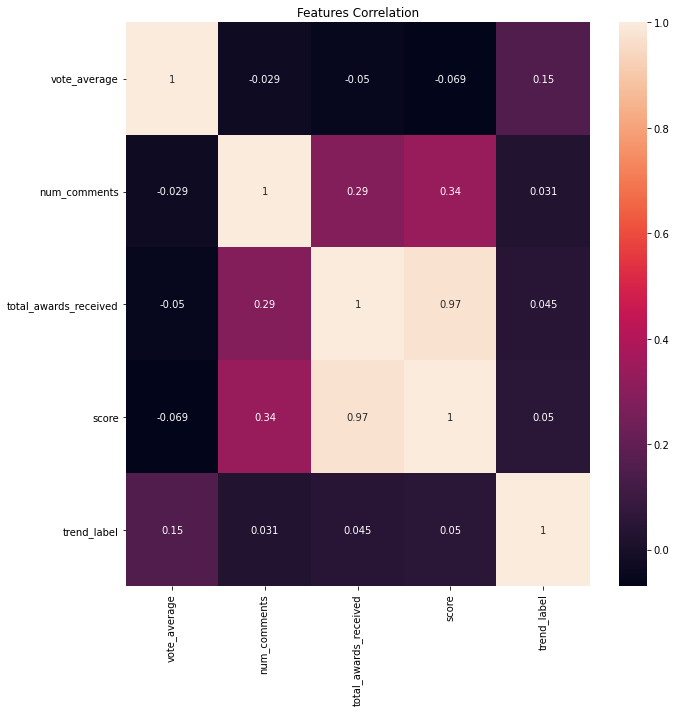

In [87]:
### only using information from REDDIT posts, sentiment , score post had, comments, awards received

plt.figure(figsize=(10,10))
sns.heatmap(model_six.corr(), annot=True)
plt.title('Features Correlation')
plt.tight_layout()
plt.show()

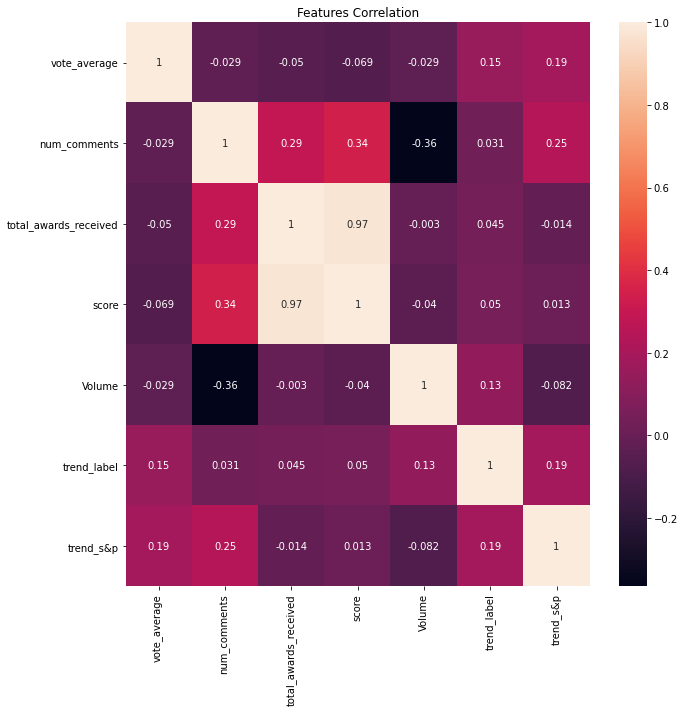

In [88]:
# model_six = model_four[['vote_average','num_comments','Volume','trend_label','trend_s'&p]]

plt.figure(figsize=(10,10))
sns.heatmap(model_seven.corr(), annot=True)
plt.title('Features Correlation')
plt.tight_layout()
plt.show()

### 3) MODELS
 We want to see if using the models below, we could forecast the trend of the day, using same day variables.
 - Model 6: use information from the reddit dataset posts
 - Model 7: use information fromreddit dataset posts, Volume of stocks traded, and S&P index trend

Dividing our models into training data, evaluation data and test data

In [59]:
##################################### MODEL 1 SPLIT AND NORMALIZATION
rows = len(model_one)

# reserve the fist 80% to train, 10% for evaluation and 10% for test
model_one_train = model_one.iloc[0:int(rows*0.8)]
model_one_eval = model_one.iloc[int(rows*0.8):(int(rows*0.8)+int(rows*0.1))]
model_one_test = model_one.iloc[(int(rows*0.8)+int(rows*0.1)):]

# splitting between features and labels
model_one_features_train = model_one_train[['vote_average']]
model_one_features_eval = model_one_eval[['vote_average']]
model_one_features_test = model_one_test[['vote_average']]

model_one_labels_train = model_one_train[['trend_label']]
model_one_labels_eval = model_one_eval[['trend_label']]
model_one_labels_test = model_one_test[['trend_label']]

# normalize features
model_one_features_train = (model_one_features_train-model_one_features_train.min())/(model_one_features_train.max()-model_one_features_train.min())


In [60]:
##################################### MODEL 2 SPLIT AND NORMALIZATION
rows = len(model_two)

# reserve the fist 80% to train, 10% for evaluation and 10% for test
model_two_train = model_two.iloc[0:int(rows*0.8)]
model_two_eval = model_two.iloc[int(rows*0.8):(int(rows*0.8)+int(rows*0.1))]
model_two_test = model_two.iloc[(int(rows*0.8)+int(rows*0.1)):]

# splitting between features and labels
model_two_features_train = model_two_train[['vote_average','Volume']]
model_two_features_eval = model_two_eval[['vote_average','Volume']]
model_two_features_test = model_two_test[['vote_average','Volume']]

model_two_labels_train = model_two_train[['trend_label']]
model_two_labels_eval = model_two_eval[['trend_label']]
model_two_labels_test = model_two_test[['trend_label']]

# normalize features ---- y = (y - min)/(max - min)
model_two_features_train = (model_two_features_train-model_two_features_train.min())/(model_two_features_train.max()-model_two_features_train.min())
model_two_features_eval = (model_two_features_eval-model_two_features_eval.min())/(model_two_features_eval.max()-model_two_features_eval.min())
model_two_features_test = (model_two_features_test-model_two_features_test.min())/(model_two_features_test.max()-model_two_features_test.min())


In [61]:
##################################### MODEL 3 SPLIT AND NORMALIZATION
rows = len(model_three)

# reserve the fist 80% to train, 10% for evaluation and 10% for test
model_three_train = model_three.iloc[0:int(rows*0.8)]
model_three_eval = model_three.iloc[int(rows*0.8):(int(rows*0.8)+int(rows*0.1))]
model_three_test = model_three.iloc[(int(rows*0.8)+int(rows*0.1)):]

# splitting between features and labels
model_three_features_train = model_three_train[['vote_average','num_comments']]
model_three_features_eval = model_three_eval[['vote_average','num_comments']]
model_three_features_test = model_three_test[['vote_average','num_comments']]

model_three_labels_train = model_three_train[['trend_label']]
model_three_labels_eval = model_three_eval[['trend_label']]
model_three_labels_test = model_three_test[['trend_label']]

# normalize features ---- y = (y - min)/(max - min)
model_three_features_train = (model_three_features_train-model_three_features_train.min())/(model_three_features_train.max()-model_three_features_train.min())
model_three_features_eval = (model_three_features_eval-model_three_features_eval.min())/(model_three_features_eval.max()-model_three_features_eval.min())
model_three_features_test = (model_three_features_test-model_three_features_test.min())/(model_three_features_test.max()-model_two_features_test.min())


In [62]:
##################################### MODEL 4 SPLIT AND NORMALIZATION
rows = len(model_four)

# reserve the fist 80% to train, 10% for evaluation and 10% for test
model_four_train = model_four.iloc[0:int(rows*0.8)]
model_four_eval = model_four.iloc[int(rows*0.8):(int(rows*0.8)+int(rows*0.1))]
model_four_test = model_four.iloc[(int(rows*0.8)+int(rows*0.1)):]

# splitting between features and labels
model_four_features_train = model_four_train[['vote_average','num_comments','Volume']]
model_four_features_eval = model_four_eval[['vote_average','num_comments','Volume']]
model_four_features_test = model_four_test[['vote_average','num_comments','Volume']]

model_four_labels_train = model_four_train[['trend_label']]
model_four_labels_eval = model_four_eval[['trend_label']]
model_four_labels_test = model_four_test[['trend_label']]

# normalize features ---- y = (y - min)/(max - min)
model_four_features_train = (model_four_features_train-model_four_features_train.min())/(model_four_features_train.max()-model_four_features_train.min())
model_four_features_eval = (model_four_features_eval-model_four_features_eval.min())/(model_four_features_eval.max()-model_four_features_eval.min())
model_four_features_test = (model_four_features_test-model_four_features_test.min())/(model_four_features_test.max()-model_four_features_test.min())


In [63]:
##################################### MODEL 5 SPLIT AND NORMALIZATION
rows = len(model_five)

# reserve the fist 80% to train, 10% for evaluation and 10% for test
model_five_train = model_five.iloc[0:int(rows*0.8)]
model_five_eval = model_five.iloc[int(rows*0.8):(int(rows*0.8)+int(rows*0.1))]
model_five_test = model_five.iloc[(int(rows*0.8)+int(rows*0.1)):]

# splitting between features and labels
model_five_features_train = model_five_train[['vote_average','num_comments','Volume','trend_s&p']]
model_five_features_eval = model_five_eval[['vote_average','num_comments','trend_s&p']]
model_five_features_test = model_five_test[['vote_average','num_comments','trend_s&p']]

model_five_labels_train = model_five_train[['trend_label']]
model_five_labels_eval = model_five_eval[['trend_label']]
model_five_labels_test = model_five_test[['trend_label']]

# normalize features ---- y = (y - min)/(max - min)
model_five_features_train = (model_five_features_train-model_five_features_train.min())/(model_five_features_train.max()-model_five_features_train.min())
model_five_features_eval = (model_five_features_eval-model_five_features_eval.min())/(model_five_features_eval.max()-model_five_features_eval.min())
model_five_features_test = (model_five_features_test-model_five_features_test.min())/(model_five_features_test.max()-model_five_features_test.min())


In [94]:
##################################### MODEL 6 SPLIT AND NORMALIZATION
rows = len(model_six)

# reserve the fist 80% to train, 10% for evaluation and 10% for test
model_six_train = model_six.iloc[0:int(rows*0.8)]
model_six_eval = model_six.iloc[int(rows*0.8):(int(rows*0.8)+int(rows*0.1))]
model_six_test = model_six.iloc[(int(rows*0.8)+int(rows*0.1)):]

# splitting between features and labels
model_six_features_train = model_six_train[['vote_average','num_comments','total_awards_received','score']]
model_six_features_eval = model_six_eval[['vote_average','num_comments','total_awards_received','score']]
model_six_features_test = model_six_test[['vote_average','num_comments','total_awards_received','score']]

model_six_labels_train = model_six_train[['trend_label']]
model_six_labels_eval = model_six_eval[['trend_label']]
model_six_labels_test = model_six_test[['trend_label']]

# normalize features ---- y = (y - min)/(max - min)
model_six_features_train = (model_six_features_train-model_six_features_train.min())/(model_six_features_train.max()-model_six_features_train.min())
model_six_features_eval = (model_six_features_eval-model_six_features_eval.min())/(model_six_features_eval.max()-model_six_features_eval.min())
model_six_features_test = (model_six_features_test-model_six_features_test.min())/(model_six_features_test.max()-model_six_features_test.min())

# model_six_features_train.head()

In [96]:
##################################### MODEL 7 SPLIT AND NORMALIZATION
rows = len(model_seven)

# reserve the fist 80% to train, 10% for evaluation and 10% for test
model_seven_train = model_seven.iloc[0:int(rows*0.8)]
model_seven_eval = model_seven.iloc[int(rows*0.8):(int(rows*0.8)+int(rows*0.1))]
model_seven_test = model_seven.iloc[(int(rows*0.8)+int(rows*0.1)):]

# splitting between features and labels
model_seven_features_train = model_seven_train[['vote_average','num_comments','total_awards_received','score','Volume','trend_s&p']]
model_seven_features_eval = model_seven_eval[['vote_average','num_comments','total_awards_received','score','Volume','trend_s&p']]
model_seven_features_test = model_seven_test[['vote_average','num_comments','total_awards_received','score','Volume','trend_s&p']]

model_seven_labels_train = model_seven_train[['trend_label']]
model_seven_labels_eval = model_seven_eval[['trend_label']]
model_seven_labels_test = model_seven_test[['trend_label']]

# normalize features ---- y = (y - min)/(max - min)
model_seven_features_train = (model_seven_features_train-model_seven_features_train.min())/(model_seven_features_train.max()-model_seven_features_train.min())
model_seven_features_eval = (model_seven_features_eval-model_seven_features_eval.min())/(model_seven_features_eval.max()-model_seven_features_eval.min())
model_seven_features_test = (model_seven_features_test-model_seven_features_test.min())/(model_seven_features_test.max()-model_seven_features_test.min())

model_seven_train.head(10)

Date  vote_average  num_comments  total_awards_received     score  \
0 2020-10-01      0.019011     97.802281               0.019011  1.825095   
1 2020-10-02      0.054795     79.386986               0.000000  1.003425   
2 2020-10-05      0.022727     73.920455               0.000000  1.003788   
3 2020-10-06      0.025284     71.800253               0.000000  1.063211   
4 2020-10-07      0.083573     66.991354               0.000000  1.001441   
5 2020-10-08      0.106628     65.703170               0.000000  1.004323   
6 2020-10-09      0.098071     84.181672               0.000000  1.004823   
7 2020-10-12      0.135400     74.122349               0.000000  1.000000   
8 2020-10-13      0.066879     77.824841               0.000000  1.007962   
9 2020-10-14      0.067335     68.945559               0.000000  1.000000   

     Volume  trend_label  trend_s&p  
0   4554100            0          0  
1   4340500            1          1  
2   2805000            1          1  
3   4535400            0          0  
4   3308600            1          1  
5  76453600            1          1  
6  77152800            0          1  
7  23655700            1          1  
8  10179700            1          0  
9  10776800            0          0